In [1]:
#Plots to visualize Time Series data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Sample time series data
#seed to save the randomness
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=365)
data = np.random.randn(365)
ts = pd.Series(data, index=dates)
print(ts)

2024-01-01    1.764052
2024-01-02    0.400157
2024-01-03    0.978738
2024-01-04    2.240893
2024-01-05    1.867558
                ...   
2024-12-26    0.698457
2024-12-27    0.003771
2024-12-28    0.931848
2024-12-29    0.339965
2024-12-30   -0.015682
Freq: D, Length: 365, dtype: float64


In [4]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts)
trend = decomposition.trend #the estimated  trend followed by data
seasonal = decomposition.seasonal # any  estimated saesonalituy
residual = decomposition.resid #presentation after subtracting trend an d seasonally from original


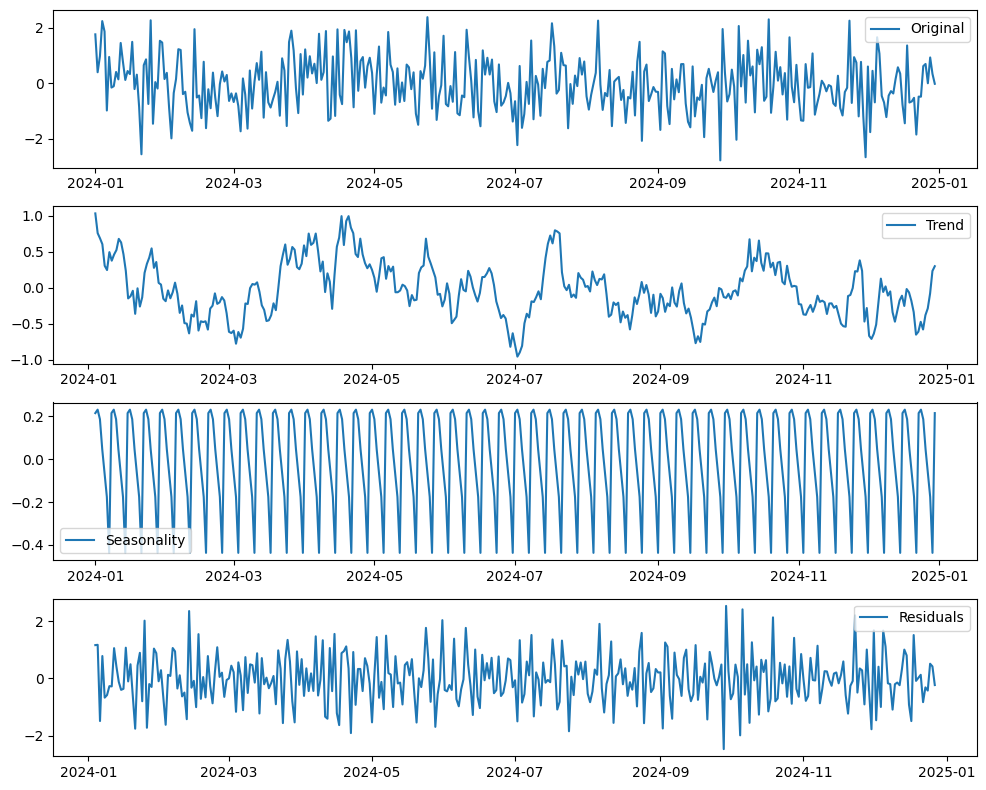

In [5]:
plt.figure(figsize=(10, 8))
plt.subplot(411)#gived row,col,index place
plt.plot(ts, label='Original') #trend+seasonal
plt.legend(loc='best')#position of legend
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')
plt.tight_layout()#automatucally adjusting axes if requied

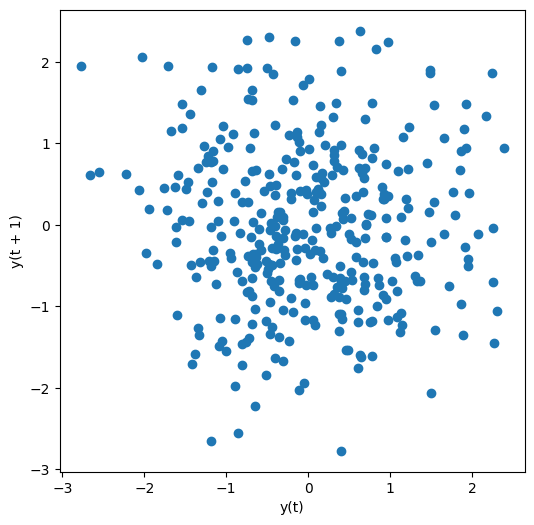

In [6]:
# Lag Plot
#A lag plot is a special type of scatter plot in which the X-axis represents the dataset
#with some time units behind or ahead as compared to the Y-axis. The difference between these time units is called lag or lagged and it is represented by k.

from pandas.plotting import lag_plot

plt.figure(figsize=(6, 6))
lag_plot(ts)
plt.show()

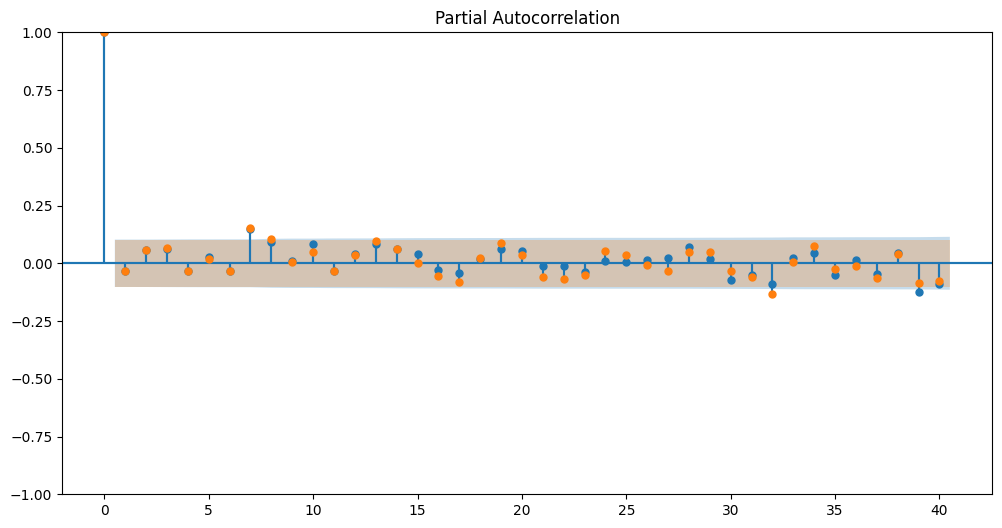

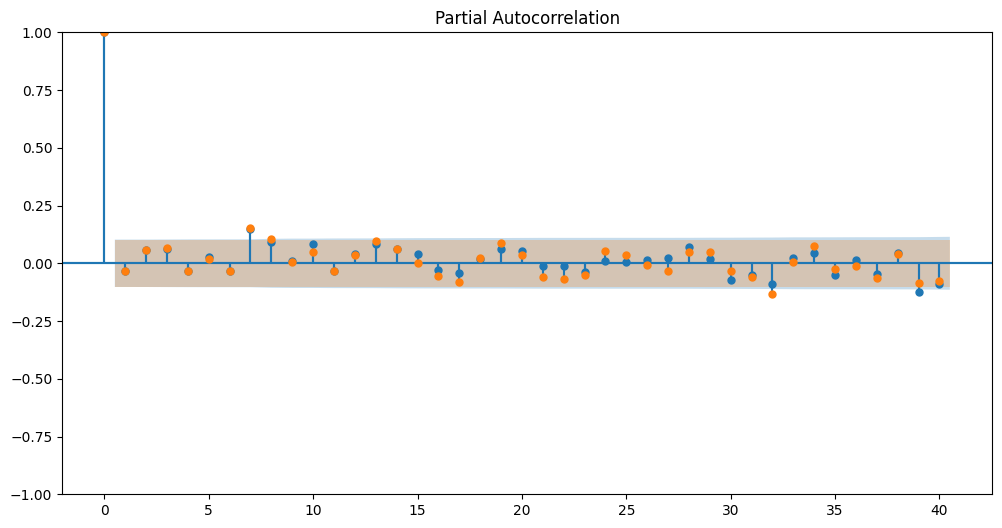

In [7]:
# Autocorrelation and Partial Autocorrelation Function (ACF and PACF) plots
#An ACF measures and plots the average correlation between data points in time series and
# previous values of the series measured for different lag lengths. A PACF is similar to an
# ACF except that each partial correlation controls for any correlation between observations of a shorter lag length

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(ts, lags=40, ax=plt.gca())
plot_pacf(ts, lags=40, ax=plt.gca())

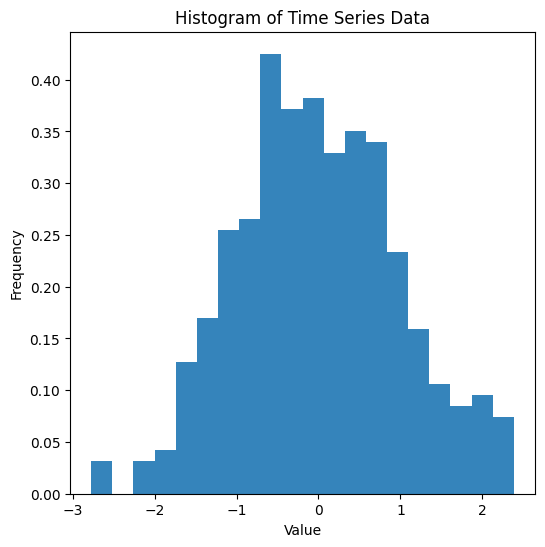

In [8]:
# Histogram
plt.figure(figsize=(6, 6))
plt.hist(ts, bins=20, density=True, alpha=0.9)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Time Series Data')
plt.show()

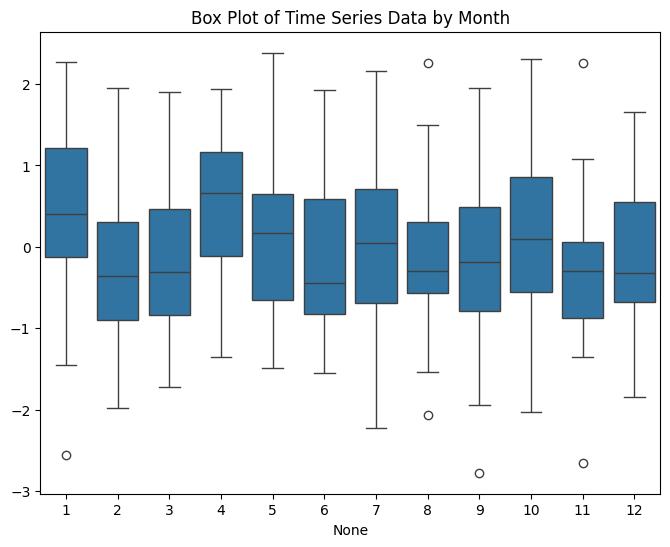

In [9]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=ts.index.month, y=ts.values)
plt.title('Box Plot of Time Series Data by Month')
plt.show()

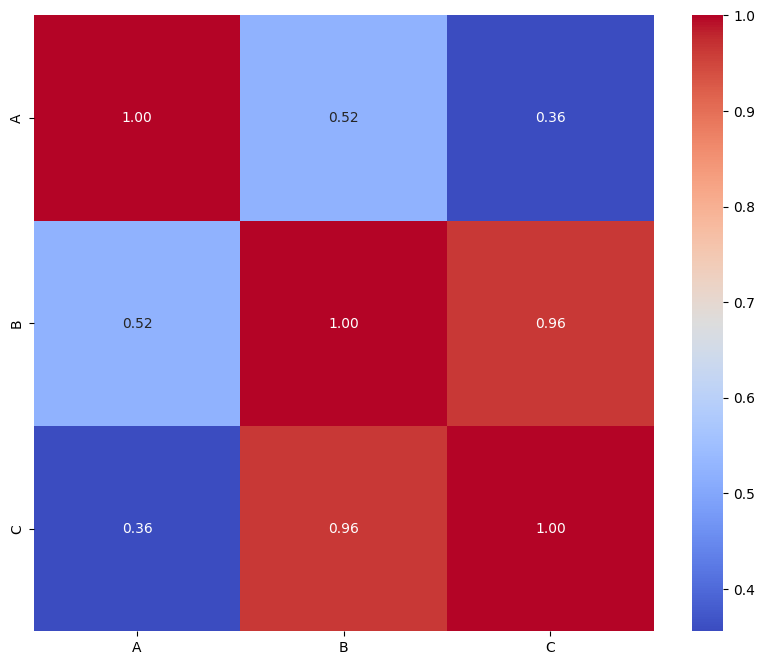

In [10]:
# Heatmap

ts1 = pd.DataFrame({
    'A': [1, 12, 33, 41, 58],
    'B': [22, 40, 16, 8, 100],
    'C': [33, 69, 29, 12, 105]
})

plt.figure(figsize=(10, 8))
sns.heatmap(ts1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

            A         B
0    0.160928 -0.190653
1   -0.394850 -0.267734
2   -1.128011  0.280442
3   -0.993124  0.841631
4   -0.249459  0.049495
..        ...       ...
360 -0.800082 -1.043129
361 -0.857078  0.677462
362  0.051820 -0.879161
363 -0.231102 -1.638807
364 -0.733313  2.149575

[365 rows x 2 columns]


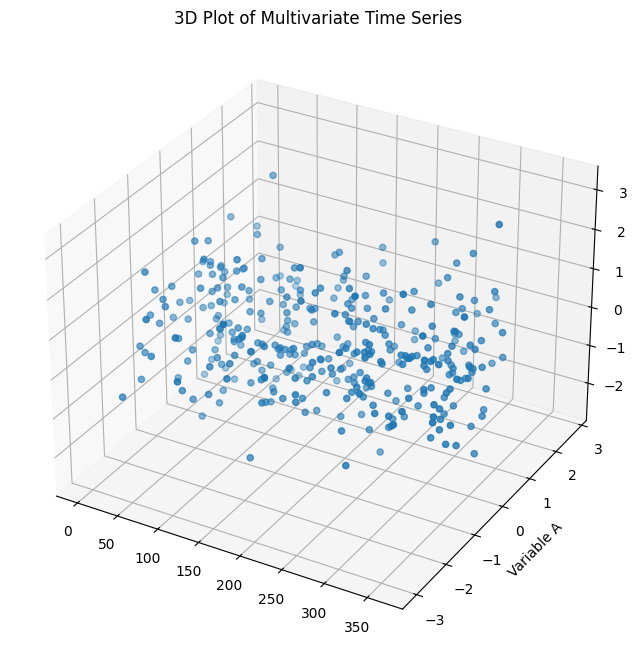

In [11]:
# 3D Plots

# Sample multivariate time series data
data_multivariate = np.random.randn(365, 2)
dates = pd.date_range(start='2024-01-01', periods=365)
ts_multivariate = pd.DataFrame(data_multivariate, columns=['A', 'B'])
print(ts_multivariate)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ts_multivariate.index, ts_multivariate['A'], ts_multivariate['B'])
ax.set_ylabel('Variable A')
ax.set_zlabel('Variable B')
ax.set_title('3D Plot of Multivariate Time Series')
plt.show()